In [10]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
## New data Frame
# pd.read_csv("https://lukeb.co/software_csv")
## To remove index of above data frame 
df_US_software_pivot=pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_US_software_pivot


,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [9]:
df_india=df[df['job_country']=='India'].copy()
df_india['job_posted_month']=df_india['job_posted_date'].dt.strftime('%B')
df_india_pivot=df_india.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_india_pivot.reset_index(inplace=True)
df_india_pivot['month_no']=pd.to_datetime(df_india_pivot['job_posted_month'],format='%B').dt.month
df_india_pivot.sort_values('month_no',inplace=True)
df_india_pivot.set_index('job_posted_month',inplace=True)
df_india_pivot.drop(columns='month_no',inplace=True)
df_india_pivot



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [12]:
df_merged=df_india_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [17]:
top_5=df_merged.sum().sort_values(ascending=False).head(5).index.tolist()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

<function matplotlib.pyplot.show(close=None, block=None)>

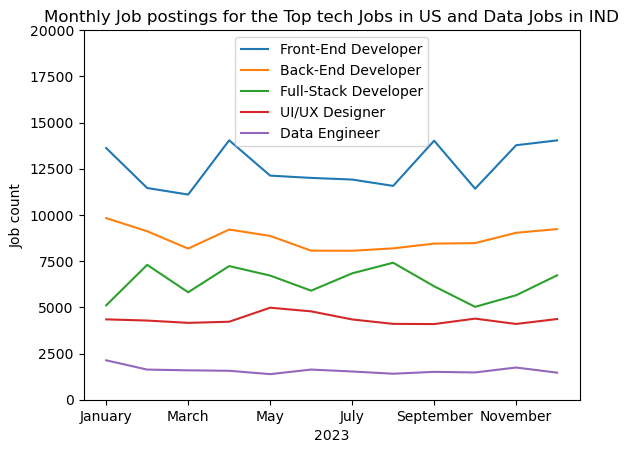

In [25]:
df_merged[top_5].plot(kind='line')
plt.title('Monthly Job postings for the Top tech Jobs in US and Data Jobs in IND')
plt.xlabel('2023')
plt.ylabel('Job count')
plt.ylim(0,20000)
plt.legend()
plt.show